## Feature Scaling 

4. Robust scaler

In [1]:
### Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Reading the dataset

data = pd.read_csv('C:\Feature_engineering_complete\Datasets\kaggle_diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.shape

(2000, 9)

### Scaling is done on numerical features to get the same scale. 

In [6]:
## Simple for loop for finding numerical features

numerical_features = [x for x in data.columns if data[x].dtype!='O']

In [7]:
numerical_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

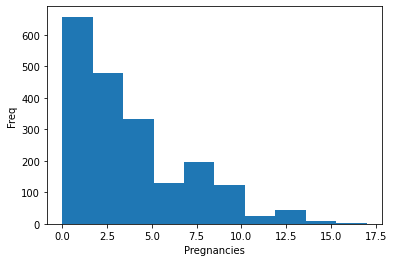

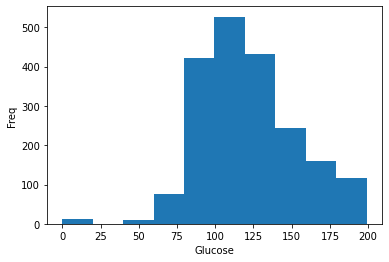

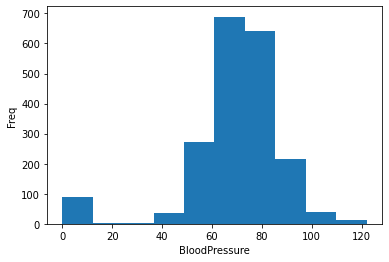

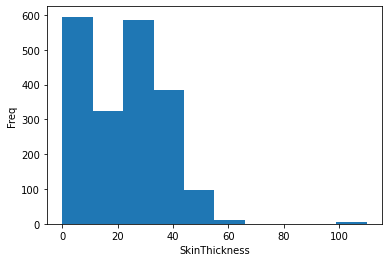

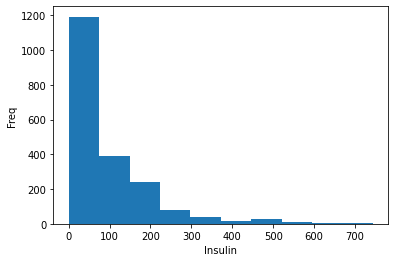

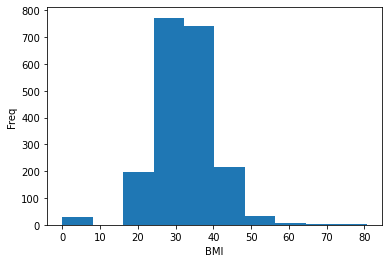

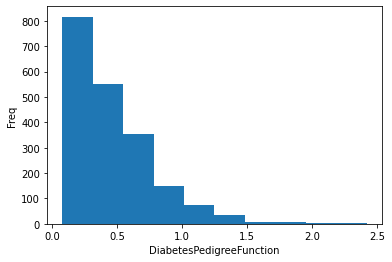

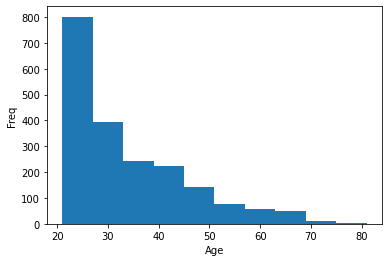

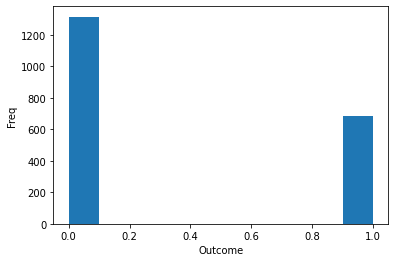

In [8]:
## Now lets plot these features 

for x in numerical_features:
    data[x].plot.hist(bins=10)
    plt.xlabel(x)
    plt.ylabel('Freq')
    plt.show()

##### Robust Scaler
It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

### Implementing min max scaler on all X values. 
### It is good practice to fit_transform on X_train and only transform on X_test to avoid bias.

In [9]:
## Dependent and independent features
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [10]:
## Train - test split

from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [11]:
## Implementing Min max scaler

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [12]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [13]:
pd.DataFrame(X_train,columns=X.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.6,-0.390244,-0.625,-0.71875,-0.338462,-1.109890,-0.125984,-0.2500
1,-0.2,-0.121951,-0.250,-0.03125,0.384615,0.230769,-0.181102,-0.1875
2,-0.4,-0.926829,0.500,0.06250,-0.053846,-0.725275,0.522310,-0.4375
3,0.6,-0.365854,0.625,-0.71875,-0.338462,-0.131868,-0.535433,0.4375
4,-0.4,-0.536585,0.625,0.06250,1.046154,0.329670,-0.396325,0.8750
...,...,...,...,...,...,...,...,...
1395,0.6,0.902439,0.125,0.28125,1.146154,-0.296703,1.194226,0.6250
1396,1.2,1.170732,1.000,-0.71875,-0.338462,-0.175824,-0.215223,1.2500
1397,0.2,0.195122,-0.125,-0.15625,0.600000,-0.340659,1.994751,1.0000
1398,0.0,-0.024390,0.125,-0.25000,0.469231,-0.626374,-0.727034,-0.3125


In [14]:
pd.DataFrame(X_test,columns=X.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.4,-0.073171,0.1250,-0.71875,-0.338462,-0.780220,0.944882,1.7500
1,0.2,-0.439024,-0.2500,0.46875,-0.338462,0.087912,-0.627297,0.2500
2,0.0,-0.829268,-0.8750,0.25000,-0.200000,0.252747,-0.125984,-0.2500
3,1.0,-0.170732,0.2500,-0.71875,-0.338462,-0.461538,-0.385827,1.8125
4,0.6,0.487805,-0.6875,-0.71875,-0.338462,-0.857143,-0.611549,1.6250
...,...,...,...,...,...,...,...,...
595,-0.6,-0.243902,-0.7500,0.06250,-0.338462,-0.615385,-0.658793,-0.3750
596,-0.4,0.170732,-0.7500,0.28125,-0.338462,0.417582,0.341207,-0.5000
597,1.2,0.951220,0.8750,0.15625,0.853846,0.252747,2.112861,0.8125
598,-0.4,0.073171,0.5000,0.78125,1.200000,0.758242,2.041995,0.7500


### You could use RobustScaler if you have outliers and want to reduce their influence. However, you might be better off removing the outliers, instead